# Step 1: Import required libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold

# Set visualization style for plots
sns.set_style("whitegrid")

# Set display options for better readability
pd.set_option("display.max_colwidth", None)

# Step 2: Load + Combine Datasets

## Step 2.1: Load Features File

In [2]:
# Load file containing the features
features = pd.read_csv(
    "UNSW-NB15 - Features.csv", # File path to read
    encoding="latin-1"          # Character encoding for reading
)

print("Features file loaded successfully...")

# Preview DataFrame
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


## Step 2.2: Load Data Files

In [3]:
# Load all 4 data files
df1 = pd.read_csv(
    "UNSW-NB15 - 1.csv", # File path to read
    header=None,         # Ensure that there is no header row in the CSV
    low_memory=False     # Load entire file to infer data types
)
df2 = pd.read_csv(
    "UNSW-NB15 - 2.csv", # File path to read
    header=None,         # Ensure that there is no header row in the CSV
    low_memory=False     # Load entire file to infer data types
)
df3 = pd.read_csv(
    "UNSW-NB15 - 3.csv", # File path to read
    header=None,         # Ensure that there is no header row in the CSV
    low_memory=False     # Load entire file to infer data types
)
df4 = pd.read_csv(
    "UNSW-NB15 - 4.csv", # File path to read
    header=None,         # Ensure that there is no header row in the CSV
    low_memory=False     # Load entire file to infer data types
)

print("Data files loaded successfully...")

Data files loaded successfully...


## Step 2.3: Analyse Loaded Files

In [4]:
# Brief analysis
print(f"Number of features in data file 1: {df1.shape[1]}")
print(f"Number of records in data file 1: {df1.shape[0]}")
print(f"Number of features in data file 2: {df2.shape[1]}")
print(f"Number of records in data file 2: {df2.shape[0]}")
print(f"Number of features in data file 3: {df3.shape[1]}")
print(f"Number of records in data file 3: {df3.shape[0]}")
print(f"Number of features in data file 4: {df4.shape[1]}")
print(f"Number of records in data file 4: {df4.shape[0]}")

Number of features in data file 1: 49
Number of records in data file 1: 700001
Number of features in data file 2: 49
Number of records in data file 2: 700001
Number of features in data file 3: 49
Number of records in data file 3: 700001
Number of features in data file 4: 49
Number of records in data file 4: 440044


## Step 2.4: Combine Data Files

In [5]:
# Combine all dataframes using concatenation
df = pd.concat(
    [df1, df2, df3, df4], # List of DataFrames to combine
    ignore_index=True     # Reset index to ensure continuous sequence
)

print("All data files combined successfully...")

All data files combined successfully...


## Step 2.5: Preview Combined DataFrame

In [6]:
# Preview combined DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


## Step 2.6: Change Column Headers

In [7]:
# Get column headers for combined DataFrame from 'features'
column_names = features["Name"].tolist()
print("Column names:")
print(column_names)

# Change column headers
df.columns = column_names
print("\nColumn names assigned successfully...")

Column names:
['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']

Column names assigned successfully...


In [8]:
# Preview complete combined DataFrame
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


# Step 3: Data Profiling

In [9]:
# Brief analysis
number_of_initial_features = df.shape[1]
number_of_initial_records = df.shape[0]
print(f"Total number of features: {number_of_initial_features}")
print(f"Total number of records: {number_of_initial_records}")

Total number of features: 49
Total number of records: 2540047


In [10]:
# More in-depth analysis
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit    

In [11]:
# More in-depth analysis
print("Basic Statistics:")
print(df.describe())

                dur        sbytes        dbytes          sttl          dttl  \
count  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06   
mean   6.587916e-01  4.339600e+03  3.642759e+04  6.278197e+01  3.076681e+01   
std    1.392493e+01  5.640599e+04  1.610960e+05  7.462277e+01  4.285089e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.037000e-03  2.000000e+02  1.780000e+02  3.100000e+01  2.900000e+01   
50%    1.586100e-02  1.470000e+03  1.820000e+03  3.100000e+01  2.900000e+01   
75%    2.145545e-01  3.182000e+03  1.489400e+04  3.100000e+01  2.900000e+01   
max    8.786638e+03  1.435577e+07  1.465753e+07  2.550000e+02  2.540000e+02   

              sloss         dloss         Sload         Dload         Spkts  \
count  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06   
mean   5.163921e+00  1.632944e+01  3.695645e+07  2.450861e+06  3.328884e+01   
std    2.251707e+01  5.659474e+01  1.186043e+08  4.

In [12]:
# More in-depth analysis
print("Target Variable Distribution:")
print(df["Label"].value_counts())

Target Variable Distribution:
Label
0    2218764
1     321283
Name: count, dtype: int64


In [13]:
# More in-depth analysis
print("Attack Category Distribution:")
print(df["attack_cat"].value_counts())

Attack Category Distribution:
attack_cat
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: count, dtype: int64


# Step 4: Data Cleaning

## Step 4.1: Backup Dataframe

In [14]:
# back up dataframe
df_backup = df.copy()

## Step 4.2: Strip Whitespace

In [15]:
# Strip whitespace from all string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

print("Whitespace removed successfully...")

Whitespace removed successfully...


## Step 4.3: Drop Redunant Features

In [16]:
# Drop protocol-specific features (HTTP/FTP only)
# These only work for specific protocols and are not useful for multiprotocol attack detection
protocol_specific = ["ct_flw_http_mthd", "is_ftp_login", "ct_ftp_cmd"]

# Drop random features
# Source ports are randomly assigned, no attack signature
random = ["sport"]

# Drop identifiers and timestamps
# IPs and times don't represent attack patterns
identifiers = ["srcip", "dstip", "Stime", "Ltime"]

# Drop redundant features
# tcprtt = synack + ackdat (derived feature)
redundant = ["tcprtt"]

# Combine all features to drop
features_to_drop = protocol_specific + random + identifiers + redundant

# Drop all unusable features
df.drop(
    columns=features_to_drop, # List of column names to remove
    inplace=True              # Modify original DataFrame directly
)

## Step 4.4: Handle Missing Values

In [17]:
# Check for missing values
print("Missing values summary:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print()
print(df.loc[df["attack_cat"].isnull(), "Label"].value_counts())

Label
0    2218764
Name: count, dtype: int64


In [18]:
# Fill all missing attack_cat with 'Normal'
df["attack_cat"] = df["attack_cat"].fillna("Normal")

# Check if missing values still exist
check_missing_values = df.isnull().sum()
print("Missing values summary:")
print(check_missing_values[check_missing_values > 0])

Missing values summary:
Series([], dtype: int64)


## Step 4.5: Remove Duplicate Attack Categories

In [19]:
# Identify attack categories
df["attack_cat"].unique()

array(['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Fuzzers', 'Worms', 'Backdoors', 'Analysis',
       'Backdoor'], dtype=object)

In [20]:
# Combine 'Backdoors' and 'Backdoor' into 1 attack category
df["attack_cat"] = df["attack_cat"].replace("Backdoor", "Backdoors")

In [21]:
# Identify attack categories
df["attack_cat"].unique()

array(['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Fuzzers', 'Worms', 'Backdoors', 'Analysis'],
      dtype=object)

## Step 4.6: Handle Duplicate Values

In [22]:
# Check for duplicated rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 512647


In [23]:
# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed successfully...")
else:
    print("No duplicates...")

Duplicates removed successfully...


## Step 4.7: Handle Infinite Values in Numeric Columns

In [24]:
# Check for infinite values in numeric columns
infinite_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"Number of infinite values: {infinite_count}")

Number of infinite values: 0


## Step 4.8: Remove Rows with Zero Duration with Data Transfer

In [25]:
# Identify rows with zero duration with data transfer
zero_duration_data_mask = (df["dur"] == 0) & ((df["sbytes"] > 0) | (df["dbytes"] > 0))

# Remove rows with zero duration with data transfer
df = df[~zero_duration_data_mask]
print(f"Removed {zero_duration_data_mask.sum()} rows with zero duration but valid data transfer.")

Removed 2800 rows with zero duration but valid data transfer.


## Step 4.9: Verify new DataFrame Properties

In [26]:
# Check for missing values and duplicated rows
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()
print(f"Number of missing values: {missing_values.sum()}\nNumber of duplicated rows: {duplicates}")

# Brief analysis
print(f"Total number of features: {df.shape[1]}")
print(f"Total number of records: {df.shape[0]}")
print(f"Number of features removed: {number_of_initial_features - df.shape[1]}")
print(f"Number of records removed: {number_of_initial_records - df.shape[0]}")
print(f"Column names: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df.head())

Number of missing values: 0
Number of duplicated rows: 0
Total number of features: 40
Total number of records: 2024600
Number of features removed: 9
Number of records removed: 515447
Column names: ['dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']

First 5 rows:
  dsport proto state       dur  sbytes  dbytes  sttl  dttl  sloss  dloss  ...  \
0     53   udp   CON  0.001055     132     164    31    29      0      0  ...   
1   1024   udp   CON  0.036133     528     304    31    29      0      0  ...   
2     53   udp   CON  0.001119     146     178    31    29      0      0  ...   
3     53  

In [27]:
# In depth analysis
print("\nInfo:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nTarget Variable Distribution:")
print(df["Label"].value_counts())
print("\nAttack Category Distribution:")
print(df["attack_cat"].value_counts())

                dur        sbytes        dbytes          sttl          dttl  \
count  2.024600e+06  2.024600e+06  2.024600e+06  2.024600e+06  2.024600e+06   
mean   6.548479e-01  5.161757e+03  4.261206e+04  4.233308e+01  3.702926e+01   
std    1.112185e+01  6.256330e+04  1.711657e+05  4.805128e+01  4.386239e+01   
min    1.000000e-06  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.162000e-03  5.200000e+02  3.040000e+02  3.100000e+01  2.900000e+01   
50%    2.790200e-02  1.836000e+03  3.276000e+03  3.100000e+01  2.900000e+01   
75%    3.502245e-01  3.728000e+03  2.082600e+04  3.100000e+01  2.900000e+01   
max    8.786638e+03  1.435577e+07  1.465753e+07  2.550000e+02  2.540000e+02   

              sloss         dloss         Sload         Dload         Spkts  \
count  2.024600e+06  2.024600e+06  2.024600e+06  2.024600e+06  2.024600e+06   
mean   6.210752e+00  1.924391e+01  7.095575e+06  3.002647e+06  3.924387e+01   
std    2.474438e+01  5.996421e+01  6.866349e+07  4.

# Step 5: Exploratory Data Analysis (EDA)

## Step 5.1: Analyse Distribution of Normal versus Attack Traffic

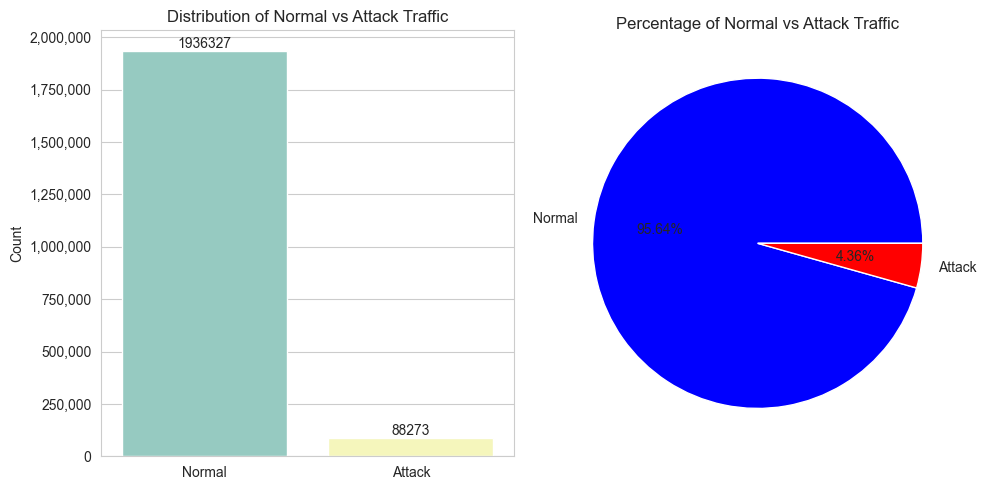

In [28]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the bar chart
sns.countplot(
    data=df,     # DataFrame to use
    x="Label",   # Column to plot on x-axis (normal and attack traffic)
    hue="Label", # Colour each bar by traffic type
    ax=ax[0]     # Which subplot to draw on
)
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Normal", "Attack"])
ax[0].set_xlabel("")
ax[0].set_ylabel("Count")
ax[0].get_legend().remove()
ax[0].set_title("Distribution of Normal vs Attack Traffic")

# Format y-axis to show full numbers (not scientific notation)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ",")))

# Add count values on top of bars
for container in ax[0].containers:
    ax[0].bar_label(container, fmt="%d")

# Plot the pie chart
count = df["Label"].value_counts()
label_names = {0: "Normal", 1: "Attack"}
plt.pie(
    count,                                             # Data (normal and attack traffic counts)
    labels=[f"{label_names[i]}" for i in count.index], # Slice labels
    colors=["blue", "red"],                            # Blue-red colour scheme
    autopct=lambda p: f"{p:.2f}%"                      # Show percentage with 2 decimals
)
ax[1].set_title("Percentage of Normal vs Attack Traffic")

plt.tight_layout()
plt.show()

## Step 5.2: Analyse Distribution of Attack Categories

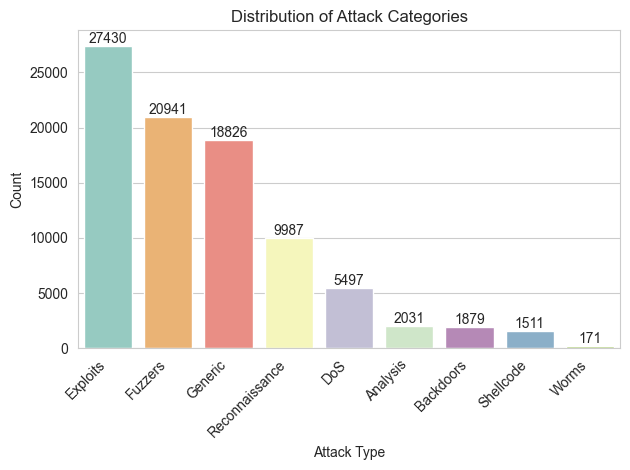

In [29]:
# Plot the bar chart
ax = sns.countplot(
    data=df[df["Label"] == 1],                                                   # Data (attack records)
    x="attack_cat",                                                              # Column to plot on x-axis (attack categories)
    hue="attack_cat",                                                            # Colour each bar by attack category
    order=df[df["Label"] == 1]["attack_cat"].value_counts(ascending=False).index # Sort bars by frequency (highest to lowest)
)
plt.title("Distribution of Attack Categories")
plt.xlabel("Attack Type")
plt.xticks(
    rotation=45, # Rotate labels 45 degrees
    ha="right"   # Align text to right for proper positioning
)
plt.ylabel("Count")

# Add count values on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

## Step 5.3: Analyse Meaningful Numeric Features for Outliers

In [30]:
# List of meaningful numeric features to check for outliers (Continuous & Count variables)
outlier_features = [

    # Volume & Duration (High values indicate DoS or Exfiltration)
    "dur",          # Duration: Long durations may indicate slow-scan attacks or errors
    "sbytes",       # Source Bytes: Massive volume indicates data exfiltration or DoS
    "dbytes",       # Destination Bytes: High return traffic (e.g., amplification attacks)
    "Spkts",        # Source Packets: High packet count with low bytes = DoS
    "Dpkts",        # Destination Packets: High packet count in response
    "Sload",        # Source Bits/Sec: Unusually high speed indicates anomalous bursts
    "Dload",        # Destination Bits/Sec: As above

    # Packet Dynamics (Loss & Size indicate congestion or exploits)
    "sloss",        # Source Packets Dropped: High loss = Network congestion or DoS
    "dloss",        # Destination Packets Dropped: As above
    "smeansz",      # Mean Packet Size (Source): Tiny packets = Scan; Giant packets = Buffer Overflow
    "dmeansz",      # Mean Packet Size (Dest): As above
    "res_bdy_len",  # Content Size: Unexpected payload sizes can indicate malware transfer

    # Time Dynamics (Jitter & Inter-arrival separate humans from bots)
    "Sjit",         # Source Jitter: High variance suggests network instability or evasion
    "Djit",         # Dest Jitter: As above
    "Sintpkt",      # Source Inter-packet Arrival: Regular intervals (low variance) = Automated tools/Bots
    "Dintpkt",      # Dest Inter-packet Arrival: As above
    "synack",       # TCP Syn-Ack Time: Delays here indicate network scanning or reachability issues
    "ackdat",       # TCP Ack-Data Time: As above

    # Connection Counts (The "ct_" features - Critical for Scanning/DoS)
    # These count how many similar connections occurred in the last 100 events.
    # Outliers here (e.g. 50+ connections) almost always signify Port Scans or Flooding.
    "ct_srv_src",       # Same service & source IP
    "ct_srv_dst",       # Same service & dest IP
    "ct_dst_ltm",       # Same dest IP (Last 100 connections)
    "ct_src_ ltm",      # Same source IP (Last 100 connections)
    "ct_src_dport_ltm", # Same source IP & dest port
    "ct_dst_sport_ltm", # Same dest IP & source port
    "ct_dst_src_ltm",   # Same dest IP & source IP
    "ct_state_ttl"      # Count of connections with same state & TTL
]

# Excluded numeric features
# 'dsport', 'proto', 'state', 'service' -> Categorical/Nominal
# 'sttl', 'dttl' -> Discrete (OS-dependent values like 64, 255)
# 'swin', 'dwin' -> Discrete (Standard TCP Window sizes like 255, 8192)
# 'stcpb', 'dtcpb' -> Random (Sequence numbers are random identifiers)
# 'trans_depth' -> Discrete (Small integer counts usually 0 or 1)
# 'is_sm_ips_ports', 'Label' -> Binary

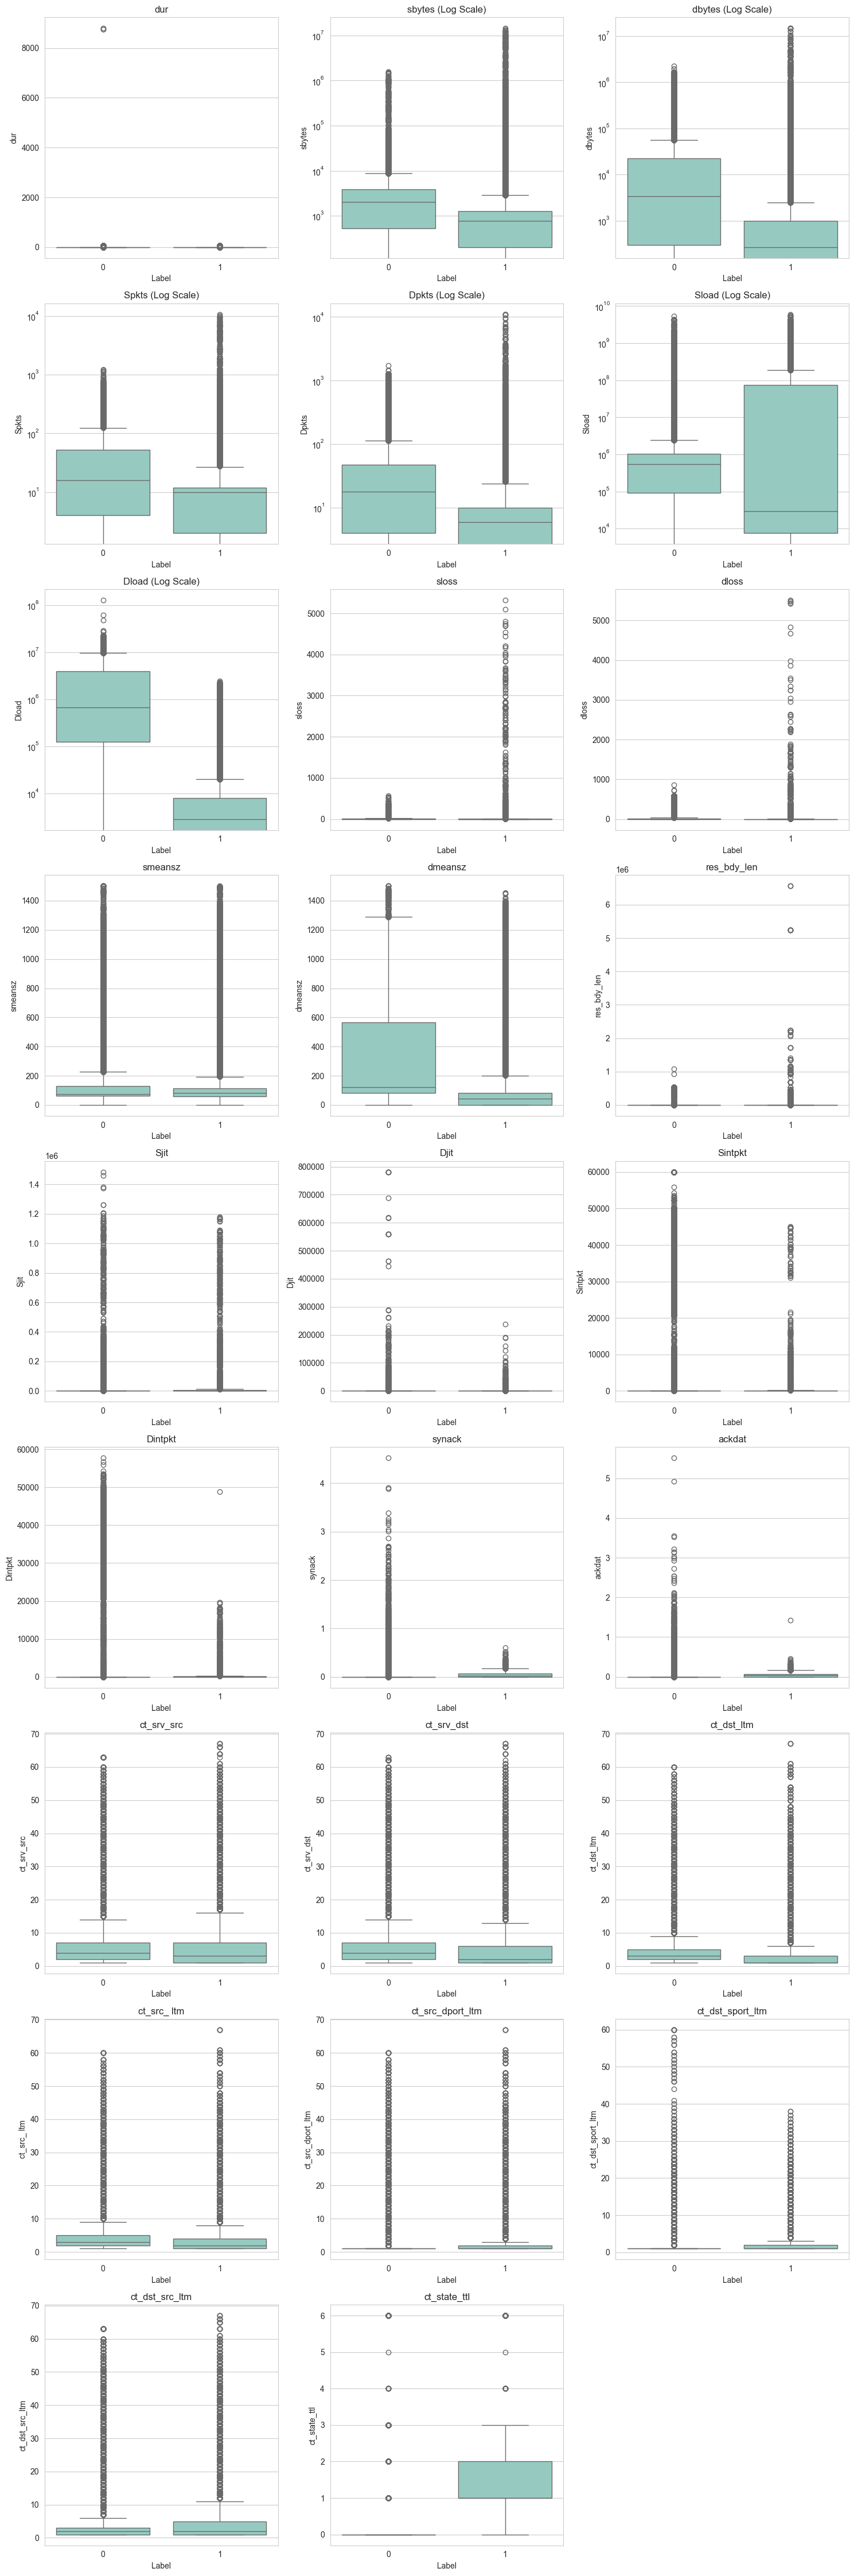

In [31]:
# Plot boxplots for identified numeric features to identify outliers
features_to_plot = outlier_features

# Determine grid size
number_of_columns = 3
number_of_rows = math.ceil(len(features_to_plot) / number_of_columns)

# Create boxplots
# Adjust height based on number of rows
plt.figure(figsize=(15, 5 * number_of_rows))

for i, column in enumerate(features_to_plot):
    plt.subplot(number_of_rows, number_of_columns, i + 1)

    # Plot using Log Scale for 'explosive' features (Bytes/Packets) to make the y-axis readable for massive values
    if column in ["sbytes", "dbytes", "Spkts", "Dpkts", "Sload", "Dload"]:
        sns.boxplot(
            data=df,   # Data (DataFrame)
            x="Label", # Column to plot on x-axis (label)
            y=column   # Numeric column to visualise distributions
        )

        # Sets the axis to log scale without changing data
        plt.yscale("log")
        plt.title(f"{column} (Log Scale)")
    else:

        # Normal scale for counts/times
        sns.boxplot(
            data=df,   # Data (DataFrame)
            x='Label', # Column to plot on x-axis (label)
            y=column   # Numeric column to visualise distributions
        )
        plt.title(column)

plt.tight_layout()
plt.show()

## Step 5.4: Analyse Corrlation between Meaningful Numeric Features

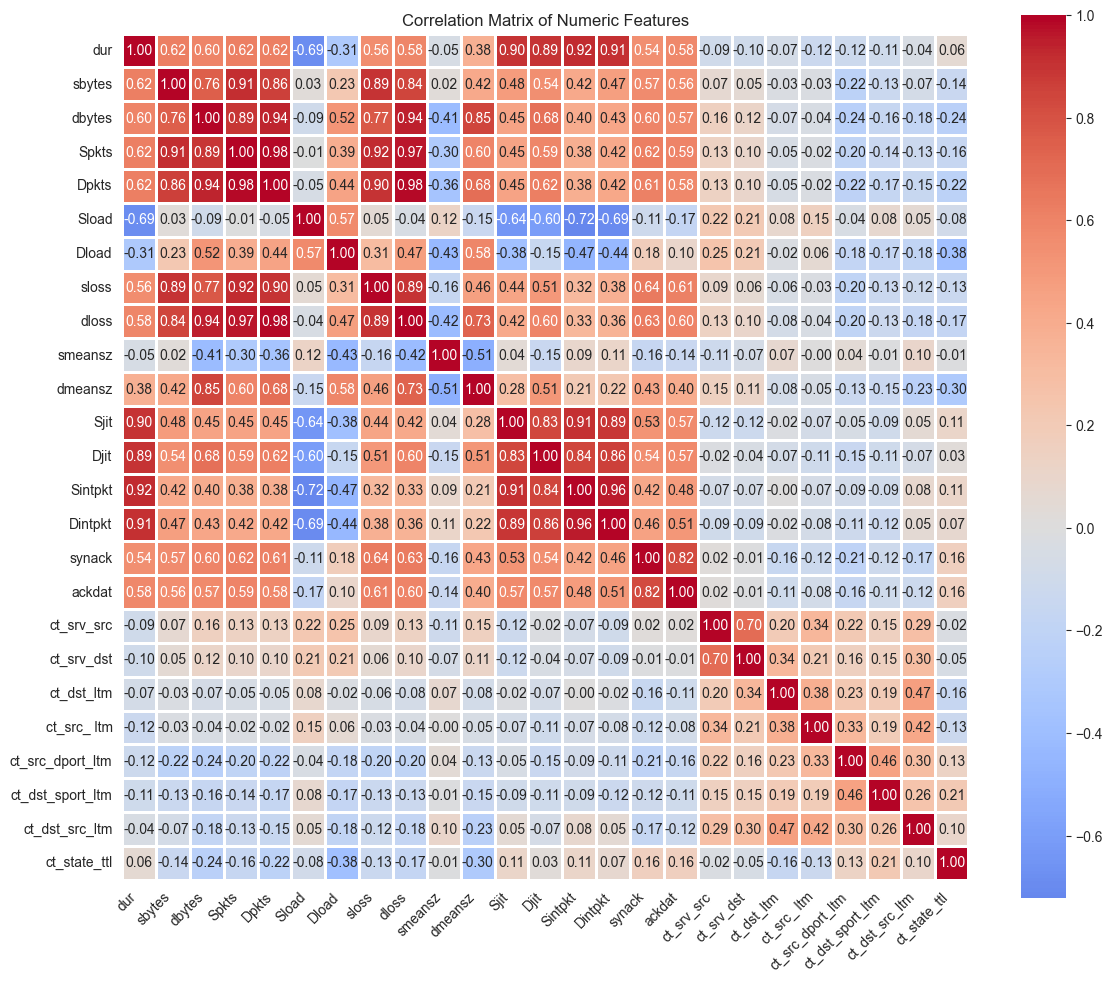

In [32]:
# List of meaningful numeric features to correlate
correlation_candidates = [
    # Volume
    "dur", "sbytes", "dbytes", "Spkts", "Dpkts", "Sload", "Dload", "sloss", "dloss", "smeansz", "dmeansz",

    # Time/Jitter
    "Sjit", "Djit", "Sintpkt", "Dintpkt", "synack", "ackdat",

    # Counts (the most likely place for redundancy)
    "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "ct_state_ttl"
]

correlation = df[correlation_candidates].corr(method="spearman")

plt.figure(figsize=(12, 10))
sns.heatmap(
    data=correlation,
    cmap="coolwarm",  # Blue-white-red color scheme
    center=0,         # White color at 0 (neutral)
    square=True,      # Make cells square-shaped
    linewidths=1 ,    # Add grid lines between cells
    fmt=".2f",        # Specify decimal place of annotation
    annot=True
)
plt.title("Correlation Matrix of Numeric Features")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

## Step 5.5: Interpret Correlation Findings

In [33]:
# Create a mask to select only the upper triangle of the correlation matrix (avoids duplicates like 'A vs B' and 'B vs A', and removes the diagonal 'A vs A')
mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)

# Apply mask to get unique correlation values
upper_triangle = correlation.where(mask)

# Stack the matrix into a list of pairs and sort by absolute correlation (.abs() is used because a correlation of -0.99 is just as redundant as +0.99)
sorted_pairs = upper_triangle.abs().stack().sort_values(ascending=False)

# Select the top 11 most correlated pairs
top_11_pairs = sorted_pairs.head(11)
print("Top 11 correlated features (candidates to drop):")
print(top_11_pairs)

Top 11 correlated features (candidates to drop):
Dpkts    dloss      0.983792
Spkts    Dpkts      0.981173
         dloss      0.965791
Sintpkt  Dintpkt    0.957990
dbytes   dloss      0.943843
         Dpkts      0.938063
Spkts    sloss      0.924502
dur      Sintpkt    0.923457
sbytes   Spkts      0.914139
dur      Dintpkt    0.910703
Sjit     Sintpkt    0.906516
dtype: float64


# Step 6: Feature Engineering

## Step 6.1: Drop Certain Correlated Features

In [34]:
# Identify redundant features to drop based on the top 11 most correlated pairs
features_to_drop = [
    "dloss",   # Redundant to Dpkts (0.98)
    "sloss",   # Redundant to Spkts (0.92)
    "dbytes",  # Redundant to Dpkts (0.94)
    "sbytes",  # Redundant to Spkts (0.91)
    "Sintpkt", # Redundant to Dur (0.92)
    "Dintpkt"  # Redundant to Sintpkt (0.96)
]

# Drop identified features
df.drop(
    columns=features_to_drop, # List of column names to remove
    inplace=True,             # Modify original DataFrame directly
)
print(f"Dropped {len(features_to_drop)} columns.")

Dropped 6 columns.


## Step 6.2: Perform Log Transformation

In [35]:
# Pick features with "explosive" ranges
log_candidates = ["dur", "Spkts", "Dpkts", "Sload", "Dload", "Sjit", "Djit"]

# Apply log transformation (np.log1p) to compress outliers
for column in log_candidates:
    if column in df.columns:
        df[column] = np.log1p(df[column])
        print(f"Transformed {column}")

Transformed dur
Transformed Spkts
Transformed Dpkts
Transformed Sload
Transformed Dload
Transformed Sjit
Transformed Djit


## Step 6.3: Perform Categorical Encoding

In [36]:
# Turn text features into numbers
# Group rare categories as "Other" to avoid creating 100+ columns

# Identify categorical columns to encode
categorical_columns = ["proto", "service", "state"]
print(f"Shape before encoding: {df.shape}")

# Loop through each identified column to encode it
for column in categorical_columns:
    if column in df.columns:

        # Find the top 10 most frequent categories
        top_10_categories = df[column].value_counts().head(10).index.tolist()

        # Replace anything not in the top 10 with 'Other' to prevent creating hundreds of useless columns
        df[column] = df[column].apply(lambda x: x if x in top_10_categories else "Other")

        # One-Hot Encode (create binary columns like 'proto_TCP', 'proto_UDP')
        dummies = pd.get_dummies(df[column], prefix=column, drop_first=False)

        # Attach new columns to the main dataframe
        df = pd.concat([df, dummies], axis=1)

        # Drop the original text column
        df.drop(columns=[column], inplace=True)

print(f"Shape after encoding: {df.shape}")

Shape after encoding: (2024600, 64)


## Step 6.4: Feature Construction

In [37]:
# Add feature that measures if traffic is one-sided
df["pkt_ratio_log"] = df["Spkts"] - df["Dpkts"]

## Step 6.5: Handling Non-Numeric Columns

In [38]:
# Check for columns that are type 'object' (text) but aren't the ones we already encoded
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Found non-numeric columns: {non_numeric_cols}")

# Remove 'dsport' column
df.drop(columns=['dsport'], inplace=True)
print("\nDropped 'dsport'. Relying on 'service' column for port information.")

Found non-numeric columns: ['dsport', 'attack_cat']

Dropped 'dsport'. Relying on 'service' column for port information.


## Step 6.6: Variance Check

In [39]:
# Check variance of DataFrame features
# threshold=0 removes columns where every row is identical
selector = VarianceThreshold(threshold=0)

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["number"]).columns

# Fit on the numeric portion of the entire DataFrame
selector.fit(df[numeric_cols])

# Identify features to keep and drop
features_to_keep = numeric_cols[selector.get_support()]
dropped_cols = list(set(numeric_cols) - set(features_to_keep))
if dropped_cols:
    print(f"Dropped {len(dropped_cols)} constant features: {dropped_cols}")

    # Remove these columns from the main DataFrame
    df.drop(columns=dropped_cols, inplace=True)
else:
    print("All numeric features have variance. Good to go!")

All numeric features have variance. Good to go!


## Step 6.7: Create Real-World Split

In [40]:
# Define features (X) and targets (y)
# Drop 'Label' (target 1) and 'attack_cat' (target 2) from features
X = df.drop(columns=["Label", "attack_cat"], errors="ignore")
y_binary = df["Label"]

# Used for the second track
y_multi = df["attack_cat"]

# Perform split (80% train, 20% test)
X_train_raw, X_test, y_bin_train_raw, y_bin_test, y_multi_train_raw, y_multi_test = train_test_split(
    X,
    y_binary,
    y_multi,
    test_size=0.2,
    random_state=42,
    stratify=y_binary # stratify=y_binary ensures the ratio of normal to attack traffic is kept in both sets initially
)
print(f"Train Set Shape: {X_train_raw.shape}")
print(f"Test Set Shape: {X_test.shape}")

Train Set Shape: (1619680, 62)
Test Set Shape: (404920, 62)


## Step 6.8: Create Training Set (Track A: Binary)

In [41]:
# Combine X and y
train_df = pd.concat([X_train_raw, y_bin_train_raw], axis=1)

# Separate
normal_df = train_df[train_df["Label"] == 0]
attack_df = train_df[train_df["Label"] == 1]

# Downsample normal to match attack count
normal_downsampled = resample(
    normal_df,
    replace=False,
    n_samples=len(attack_df), # Match the number of attacks
    random_state=42
)

# Combine and shuffle
train_bin_balanced = pd.concat([normal_downsampled, attack_df])
train_bin_balanced = train_bin_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate X and y
X_train_bin = train_bin_balanced.drop(columns=["Label"])
y_train_bin = train_bin_balanced["Label"]
print(f"Balanced Binary Train: {X_train_bin.shape} (50% Normal, 50% Attack)")

Balanced Binary Train: (141236, 62) (50% Normal, 50% Attack)


In [42]:
# RobustScaler (fit on train, transform test)
scaler_bin = RobustScaler()
X_train_bin_scaled = pd.DataFrame(scaler_bin.fit_transform(X_train_bin), columns=X_train_bin.columns)
X_test_bin_scaled = pd.DataFrame(scaler_bin.transform(X_test), columns=X_test.columns)

# Find top features for binary model
rf_bin = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_bin.fit(X_train_bin_scaled, y_train_bin)

# Extract top 20 features
importances = pd.Series(rf_bin.feature_importances_, index=X_train_bin.columns).sort_values(ascending=False)
top_features_bin = importances.head(20).index.tolist()

print("Top 20 Features for Binary Model:")
print(top_features_bin)

Top 20 Features for Binary Model:
['sttl', 'ct_state_ttl', 'Dload', 'dttl', 'pkt_ratio_log', 'synack', 'ackdat', 'dmeansz', 'Dpkts', 'state_INT', 'Sload', 'dur', 'Sjit', 'Djit', 'state_CON', 'Spkts', 'ct_dst_ltm', 'smeansz', 'ct_dst_src_ltm', 'stcpb']


## Step 6.9: Create Training Set (Multi-Class)

In [43]:
# Combine X and y
train_multi_df = pd.concat([X_train_raw, y_multi_train_raw, y_bin_train_raw], axis=1)

# Filter for rows that are attacks (Label=1)
train_multi_only = train_multi_df[train_multi_df["Label"] == 1].drop(columns=["Label"])

# Separate X and y
X_attacks = train_multi_only.drop(columns=["attack_cat"])
y_attacks = train_multi_only["attack_cat"]

# Encode targets as SMOTE requires numbers not strings like "DoS"
le = LabelEncoder()
y_attacks_enc = le.fit_transform(y_attacks)

# Apply SMOTE to fix attack category imbalance
print(f"Original Attack Shape: {X_attacks.shape}")
print("Applying SMOTE to generate synthetic data...")
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_attacks, y_attacks_enc)
print(f"New SMOTE Train Shape: {X_train_smote.shape}")

# Scaling
# Fit scaler on the NEW SMOTE data
scaler_multi = RobustScaler()
X_train_smote_scaled = pd.DataFrame(scaler_multi.fit_transform(X_train_smote), columns=X_attacks.columns)

New SMOTE Train Shape: (198009, 62)


In [44]:
# Find top features for multi-class model
temp_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
temp_rf.fit(X_train_smote_scaled, y_train_smote)

# Extract top 20 features
importances_multi = pd.Series(temp_rf.feature_importances_, index=X_train_smote_scaled.columns).sort_values(ascending=False)
top_features_multi = importances_multi.head(20).index.tolist()
print("Top 20 Features for Multi-Class Model:")
print(top_features_multi)

# Finalise training set
X_train_final = X_train_smote_scaled[top_features_multi]
y_train_final = y_train_smote

Top 20 Features for Multi-Class Model:
['smeansz', 'Sload', 'dur', 'ct_srv_dst', 'dmeansz', 'sttl', 'ct_dst_src_ltm', 'service_-', 'service_http', 'Dpkts', 'ct_srv_src', 'pkt_ratio_log', 'Dload', 'Sjit', 'Spkts', 'proto_udp', 'service_dns', 'Djit', 'ct_src_ ltm', 'res_bdy_len']


## Step 6.10: Filter Features for Binary Model

In [45]:
# Filter features for binary model using the list 'top_features_bin'
X_train_bin_final = X_train_bin_scaled[top_features_bin]
X_test_bin_final = X_test_bin_scaled[top_features_bin]

# Step 7: Predictive Modelling and Model Evaluation

## Step 7.1: Train and Evaluate Binary Model

In [46]:
# Initialise and train
print("Training Binary Model...")
rf_binary = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

# Train on the final binary dataset (20 features)
rf_binary.fit(X_train_bin_final, y_train_bin)

# Predict using the final binary test set
y_pred_bin = rf_binary.predict(X_test_bin_final)

# Evaluate
print(classification_report(y_bin_test, y_pred_bin))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    387265
           1       0.76      1.00      0.86     17655

    accuracy                           0.99    404920
   macro avg       0.88      0.99      0.93    404920
weighted avg       0.99      0.99      0.99    404920



## Step 7.2: Train and Evaluate Multi-Class Model

In [47]:
# Filter rows to keep only attacks in the test set as the multi-class model only recognises attacks traffic
X_test_attacks = X_test[y_bin_test == 1].copy()

# Use the Multi-class Scaler (fitted on SMOTE data) to ensure the same math as the training set
X_test_attacks_scaled = pd.DataFrame(scaler_multi.transform(X_test_attacks), columns=X_test.columns)

# Filter features for multi-class model using the list 'top_features_multi'
X_test_final = X_test_attacks_scaled[top_features_multi]

# Convert string labels ("DoS") to numbers (0)
y_test_attacks_str = y_multi_test[y_bin_test == 1].copy()
y_test_attacks = le.transform(y_test_attacks_str)

In [48]:
# Initialise and train
print("Training Multi-Class Model...")
rf_multi = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

# Train on the final multi-class dataset (20 features)
rf_multi.fit(X_train_final, y_train_final)

# Predict using the final multi-class test set
y_pred_multi = rf_multi.predict(X_test_final)

# Evaluate
# Map numbers back to names for readability
target_names = le.inverse_transform(np.unique(y_test_attacks))
print(classification_report(y_test_attacks, y_pred_multi, target_names=target_names, zero_division=0))

                precision    recall  f1-score   support

      Analysis       0.13      0.32      0.19       422
     Backdoors       0.10      0.22      0.14       362
           DoS       0.41      0.30      0.35      1091
      Exploits       0.85      0.80      0.83      5429
       Fuzzers       0.92      0.88      0.90      4270
       Generic       0.94      0.86      0.90      3651
Reconnaissance       0.83      0.76      0.80      2077
     Shellcode       0.49      0.83      0.62       319
         Worms       0.25      0.65      0.36        34

      accuracy                           0.77     17655
     macro avg       0.55      0.62      0.56     17655
  weighted avg       0.82      0.77      0.79     17655



# Step 8: Data Visualisation

## Step 8.1: Binary Model

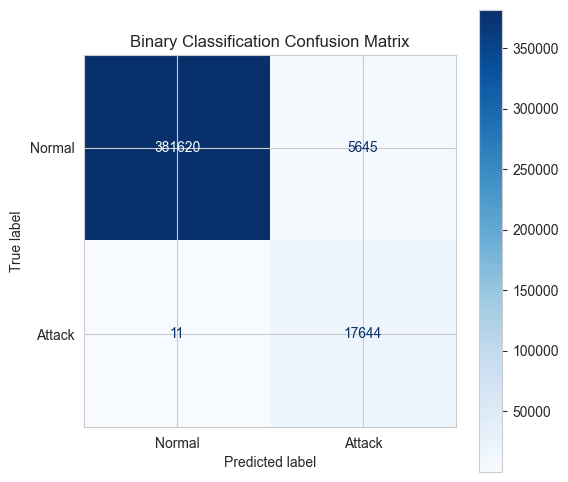

In [49]:
# 1. Calculate matrix
# y_bin_test: The true answers (0 = Normal, 1 = Attack)
# y_pred_bin: The model's predictions
cm_bin = confusion_matrix(y_bin_test, y_pred_bin)

# Define label names
target_names_bin = ["Normal", "Attack"]

# Plot
fig, ax = plt.subplots(figsize=(6, 6))  # Slightly smaller than multi-class, but consistent style
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bin, display_labels=target_names_bin)

# Specify blue colormap
disp.plot(cmap="Blues", ax=ax, values_format="d") # 'd' ensures numbers are integers, not scientific notation

plt.title("Binary Classification Confusion Matrix")
plt.show()

## Step 8.2: Multi-Class Model

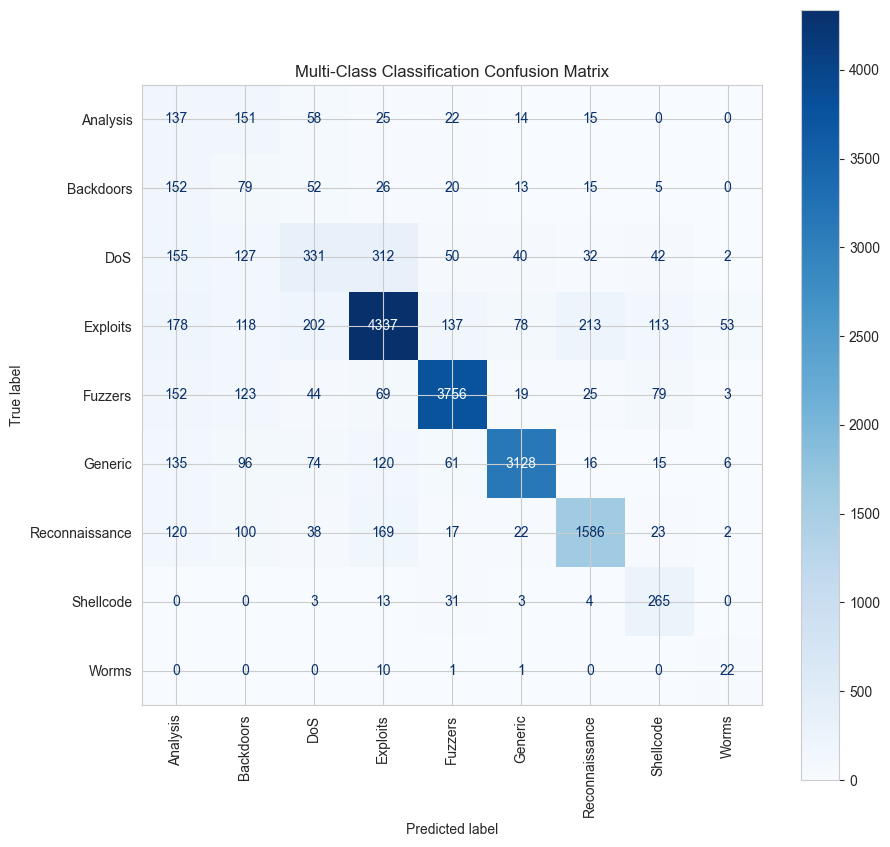

In [50]:
# Calculate matrix
# y_test_attacks: The true answers (numeric)
# y_pred_multi:   The model's predictions (numeric)
cm_multi = confusion_matrix(y_test_attacks, y_pred_multi)

# Get correct label names using LabelEncoder to get the names in the exact order of the numbers
target_names = le.inverse_transform(np.unique(y_test_attacks))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=target_names)

# Specify blue colormap
disp.plot(cmap="Blues", ax=ax, xticks_rotation='vertical')

plt.title("Multi-Class Classification Confusion Matrix")
plt.show()